In [1]:
import numpy as np 
import pandas as pd 
import os

In [24]:
breweries= pd.read_csv('/Users/snigdha/Desktop/dsc680/breweries_us.csv')
breweries.head()

,brewery_name,type,address,website,state,state_breweries
0,Valley Brewing Co.,Brewpub,"PO Box 4653, Stockton, California, 95204",http://www.valleybrew.com/,california,284
1,Valley Brewing Co.,Brewpub,"157 Adams St., Stockton, California, 95204",http://www.valleybrew.com/,california,284
2,Valley Brewing Co,Microbrewery,"1950 W Freemont, Stockton, California, 95203",http://www.valleybrew.com/,california,284
3,Ukiah Brewing Company,Brewpub,"102 S. State St., Ukiah, California, 95482",http://www.ukiahbrewingco.com/,california,284
4,Tustin Brewing Co.,Brewpub,"13011 Newport Ave. #100, Tustin, California, 9...",http://www.tustinbrewery.com/,california,284


In [25]:
population = pd.read_csv('/Users/snigdha/Desktop/dsc680/us2021census.csv')
population.head()

,City,State,Type,Counties,Population,Latitude,Longitude
0,New York,NY,City,Bronx;Richmond;New York;Kings;Queens,8804190,40.714,-74.007
1,Los Angeles,CA,City,Los Angeles,3898747,34.052,-118.243
2,Chicago,IL,City,Cook;DuPage,2746388,41.882,-87.628
3,Houston,TX,City,Harris;Fort Bend;Montgomery,2304580,29.760,-95.363
4,Phoenix,AZ,City,Maricopa,1608139,33.448,-112.074


##### Data Cleansing

In [26]:

breweries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2407 entries, 0 to 2406
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   brewery_name     2407 non-null   object
 1   type             2407 non-null   object
 2   address          2407 non-null   object
 3   website          2399 non-null   object
 4   state            2407 non-null   object
 5   state_breweries  2407 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 113.0+ KB


In [27]:
breweries.isnull().sum()

brewery_name       0
type               0
address            0
website            8
state              0
state_breweries    0
dtype: int64

The 'website' column in the breweries dataset contains 8 missing values. It's likely that these 8 breweries don't have an online presence. Fortunately, I have comprehensive information for all other columns, providing a solid foundation for analysis.

##### Checking for any duplicates for both the datasets

In [28]:
breweries[breweries.duplicated()]

,brewery_name,type,address,website,state,state_breweries


In [29]:
population[population.duplicated()]

,City,State,Type,Counties,Population,Latitude,Longitude


#### Answering Analytical Question 1

What trends emerge when examining how breweries are distributed by address or type? Are certain cities, states, or regions more inclined to host specific brewery types?

In [30]:
dataframe = breweries.groupby('type')['state'].count()
dataframe

type
BOP-BrewOnPremise              6
BOP-BrewOnPremise-Closed       2
Brewpub                     1320
Brewpub-Closed               113
Contract                       7
ContractBrewery              142
ContractBrewery-Closed         2
Microbrewery                 705
Microbrewery-Closed           45
Mircobrewery                  19
MultitapBar                    2
RegionalBrewery               44
Name: state, dtype: int64

In [31]:
# Group the data by 'type' and counting the no of breweries for each type
dataframe = breweries.groupby('type')['state'].count()
dataframe = dataframe.sort_values(ascending=False)

dataframe

type
Brewpub                     1320
Microbrewery                 705
ContractBrewery              142
Brewpub-Closed               113
Microbrewery-Closed           45
RegionalBrewery               44
Mircobrewery                  19
Contract                       7
BOP-BrewOnPremise              6
BOP-BrewOnPremise-Closed       2
ContractBrewery-Closed         2
MultitapBar                    2
Name: state, dtype: int64

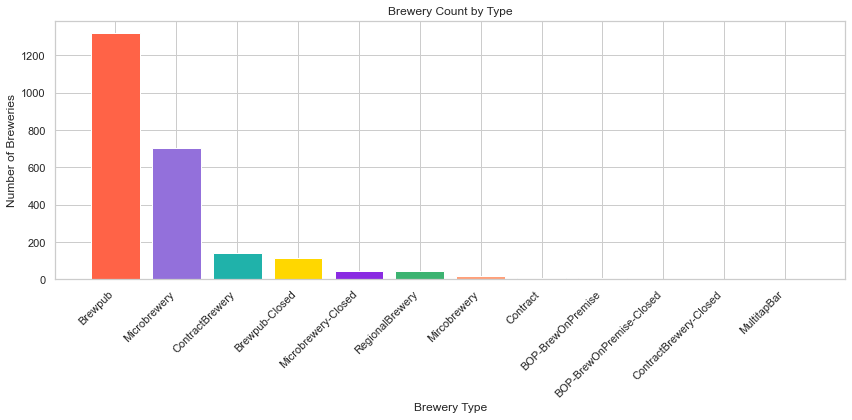

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extracting data from the DataFrame
types = dataframe.index
count = dataframe.values

# Updated colors for each 'type'
colors = ['#FF6347', '#9370DB', '#20B2AA', '#FFD700', '#8A2BE2', '#3CB371', '#FFA07A', '#00CED1', '#FF69B4', '#4682B4', '#32CD32', '#FA8072']

# Creating a bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(types, count, color=colors)

# Adding labels and title
plt.xlabel('Brewery Type')
plt.ylabel('Number of Breweries')
plt.title('Brewery Count by Type')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.tight_layout()
plt.show()


The brewpub stands out as the most prevalent brewery type across the U.S., totaling 1320 establishments, while the MultitapBar emerges as the least frequently found among them.

### Q-2 : create a simple bar graph to find which state has the highest number of breweries.

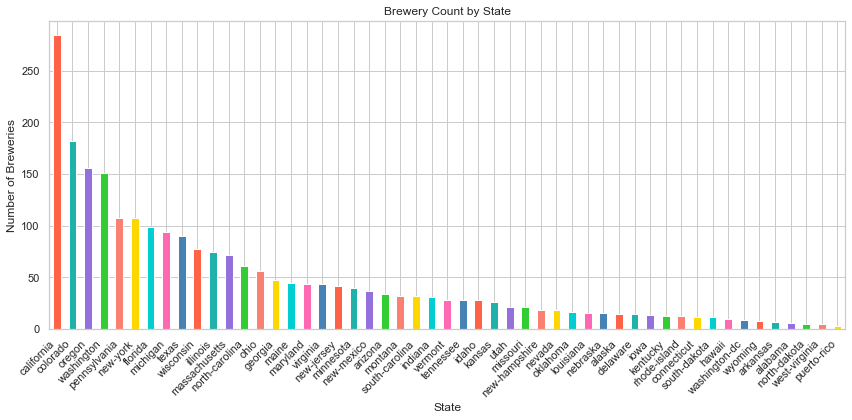

In [33]:
state_counts = breweries['state'].value_counts()

# Sorting the data in descending order to find the state with the most breweries
state_counts = state_counts.sort_values(ascending=False)

# New set of colors for the bars
new_colors = ['#FF6347', '#20B2AA', '#9370DB', '#32CD32', '#FA8072', '#FFD700', '#00CED1', '#FF69B4', '#4682B4']

# Creating a bar plot with the updated colors
plt.figure(figsize=(12, 6))
state_counts.plot(kind='bar', color=new_colors)

# Adding labels and title
plt.xlabel('State')
plt.ylabel('Number of Breweries')
plt.title('Brewery Count by State')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Displaying the plot
plt.tight_layout()
plt.show()


The bar plot showcasing the distribution of breweries across various states in the US. It begins by collecting data on the number of breweries in each state and then arranges this information in descending order to highlight the states with the most significant brewery presence. California has the most whereas puertorico has the least.

## How many breweries of each type exist in each state?

<Figure size 864x576 with 0 Axes>

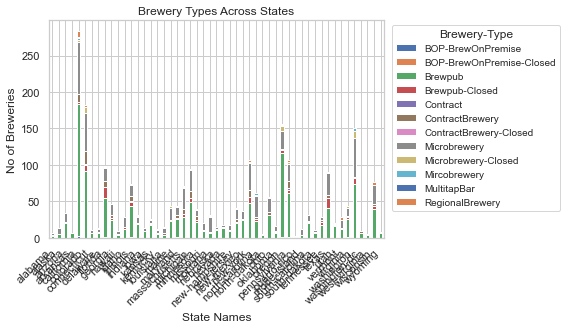

In [34]:
# Grouping the data by state and type, then counting the number of breweries
brewery_counts = breweries.groupby(['state', 'type']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))

# Creating a stacked bar chart to illustrate brewery type distribution per state
ax = brewery_counts.plot(kind='bar', stacked=True)

# Adjusting the spacing between states on the x-axis
ax.set_xticks(range(len(brewery_counts.index)))
ax.set_xticklabels(brewery_counts.index, rotation=45, ha="right")

plt.title('Brewery Types Across States')
plt.xlabel('State Names')
plt.ylabel('No of Breweries')

# Resizing the legend for better display
plt.legend(title='Brewery-Type', bbox_to_anchor=(1.01, 1), loc='upper left', fontsize='small')

plt.show()


The visual representation offers a comprehensive insight into the spread of diverse brewery types like Brewpubs, Microbreweries, and Contract Breweries across various states. By observing the bar heights within each state, it becomes apparent which brewery type dominates in specific regions. This facilitates a clear comparison of each state's brewery landscape, aiding in swift analysis.

The chart serves as a rapid identification tool for prevalent brewery types, which proves invaluable for market analysis and decision-making processes.

The Southeast Region, encompassing states like Alabama, Arkansas, Florida, and Georgia, emerges as a potential expansion market. The relatively shorter bars for these states indicate room for growth. The region's rising affinity for craft beer, coupled with favorable regulations and a robust tourism industry, presents an encouraging market prospect.

States bordering the Midwest and West regions, including Kansas, Nevada, and Wyoming, exhibit shorter bars, signifying comparatively smaller brewery markets and lower population density. While these areas may attract tourists, the consistency and breadth of their appeal might not match more popular tourist destinations across the country.

Question 3 : What defines the attributes, like the existence of websites and city populations, within densely populated urban areas where breweries are most concentrated? Are there specific urban centers within this brewery-rich landscape that stand out as potential markets for industry expansion?

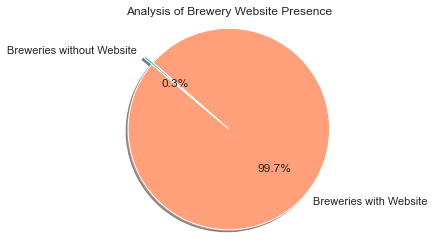

In [35]:
# Counting breweries with and without websites
with_website = breweries_df['website'].count()
without_website = len(breweries) - with_website

# Creating a pie chart to depict website presence
labels = ['Breweries with Website', 'Breweries without Website']
sizes = [with_website, without_website]
colors = ['#FFA07A', '#20B2AA']  # Different colors for better visualization
explode = (0.1, 0)  # Exploding the slice with websites

plt.figure(figsize=(4, 4))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')

plt.title('Analysis of Brewery Website Presence')
plt.show()


According to this pie chart, 99.7% of breweries maintain an online presence via a website, while a mere 0.3% lack a website (this was verified when assessing missing data). This emphasizes the industry's strong digital engagement, as most breweries leverage websites to connect with their audience, disseminate information, and potentially broaden their market outreach. It underscores the significance of establishing an online footprint for breweries to remain competitive and actively engage with a broader customer base.

Summing up, the brewery data analysis reveals strategic growth prospects at both city and regional levels:

The West Coast, especially California, holds a prominent position in the brewery scene, while the Southeast Region stands out as an unexplored market with considerable promise.

Urban centers boasting populations under 275,000, like Omaha and Nashville, signify potential zones for focused expansion owing to their limited brewery presence. Cities with distinct attributes, such as Frederick and Fargo, offer pathways for specialized market engagement.

The evident correlation between population size and brewery count, as demonstrated in the scatter plot, emphasizes the pivotal role of demographic factors in shaping brewery distribution.